In [11]:
import pandas as pd

ruta = "/Users/valentinalinares/Desktop/Data.csv"
df = pd.read_csv(ruta)

#primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

#columnas y dimensiones
print("\nColumnas del dataset:")
print(df.columns)

print("\nDimensiones del dataset:")
print(df.shape)


Primeras filas del dataset:
    Country Name Country Code    Time Time Code  \
0  United States          USA  1990.0    YR1990   
1  United States          USA  1991.0    YR1991   
2  United States          USA  1992.0    YR1992   
3  United States          USA  1993.0    YR1993   
4  United States          USA  1994.0    YR1994   

  Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT]  \
0                                                 ..                                                
1                                                 ..                                                
2                                                 ..                                                
3                                                 ..                                                
4                                                 ..                                                

   Access to electricity (% of rural population with acces

In [12]:
#filtramos los datos para China y Estados Unidos, entre 1990 y 2015
df_filtered = df[(df['Country Name'].isin(['China', 'United States'])) & 
                 (df['Time'] >= 1990) & (df['Time'] <= 2015)]

#seleccionamos columnas relevantes
columns_of_interest = [
    'Country Name', 'Time',
    'Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]',
    'Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]',
    'Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT]',
    'Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]'
]
df_filtered = df_filtered[columns_of_interest]

#renombramos dichas columnas para simplificar
df_filtered.columns = [
    'Country', 'Year', 'Renewable Electricity Output (GWh)',
    'Renewable Share of Electricity (%)', 'Total Electricity Output (GWh)',
    'Renewable Share of TFEC (%)'
]

print("Datos filtrados y seleccionados:")
print(df_filtered.head())


Datos filtrados y seleccionados:
         Country    Year  Renewable Electricity Output (GWh)  \
0  United States  1990.0                            369241.0   
1  United States  1991.0                            350142.0   
2  United States  1992.0                            324316.0   
3  United States  1993.0                            355578.0   
4  United States  1994.0                            336458.0   

   Renewable Share of Electricity (%)  Total Electricity Output (GWh)  \
0                           11.528647                       3202813.0   
1                           10.757414                       3254890.0   
2                            9.916110                       3270597.0   
3                           10.484326                       3391520.0   
4                            9.747236                       3451830.0   

   Renewable Share of TFEC (%)  
0                     4.175462  
1                     4.507920  
2                     4.763083  
3          

In [13]:
#función para calcular proporción renovable del total
def calculate_renewable_ratio(row):
    return (row['Renewable Electricity Output (GWh)'] / row['Total Electricity Output (GWh)']) * 100

#aplicamos la transformación
df_filtered['Calculated Renewable Ratio (%)'] = df_filtered.apply(calculate_renewable_ratio, axis=1)

print("\nDatos con nueva transformación (proporción renovable calculada):")
print(df_filtered.head())



Datos con nueva transformación (proporción renovable calculada):
         Country    Year  Renewable Electricity Output (GWh)  \
0  United States  1990.0                            369241.0   
1  United States  1991.0                            350142.0   
2  United States  1992.0                            324316.0   
3  United States  1993.0                            355578.0   
4  United States  1994.0                            336458.0   

   Renewable Share of Electricity (%)  Total Electricity Output (GWh)  \
0                           11.528647                       3202813.0   
1                           10.757414                       3254890.0   
2                            9.916110                       3270597.0   
3                           10.484326                       3391520.0   
4                            9.747236                       3451830.0   

   Renewable Share of TFEC (%)  Calculated Renewable Ratio (%)  
0                     4.175462               

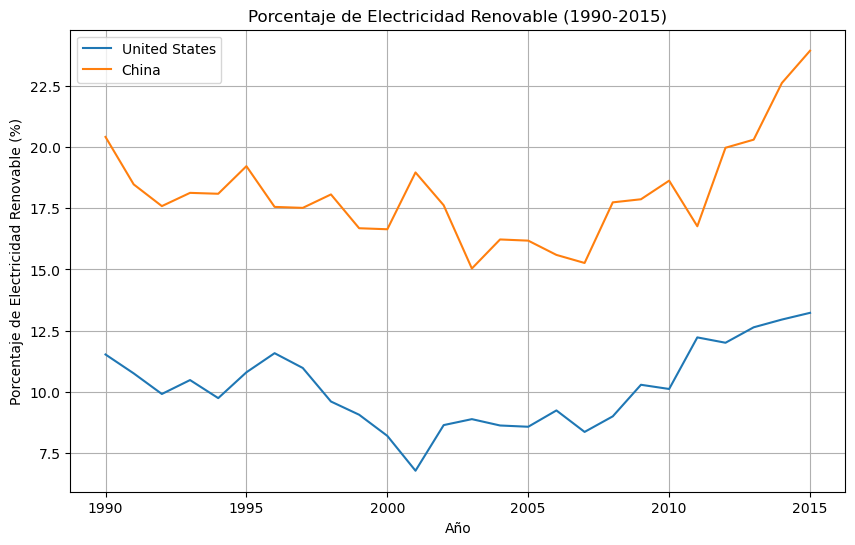

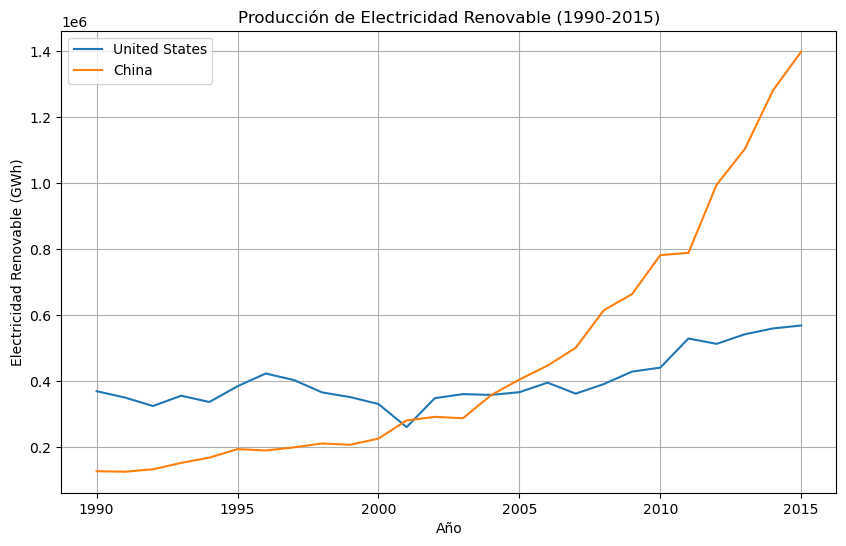

In [14]:
#creación de gráficos
import matplotlib.pyplot as plt

#Gráfico 1: Comparar el porcentaje de electricidad renovable
plt.figure(figsize=(10, 6))
for country in df_filtered['Country'].unique():
    data = df_filtered[df_filtered['Country'] == country]
    plt.plot(data['Year'], data['Renewable Share of Electricity (%)'], label=country)

plt.title('Porcentaje de Electricidad Renovable (1990-2015)')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Electricidad Renovable (%)')
plt.legend()
plt.grid()
plt.show()

#Gráfico 2: Tendencias de producción de electricidad renovable
plt.figure(figsize=(10, 6))
for country in df_filtered['Country'].unique():
    data = df_filtered[df_filtered['Country'] == country]
    plt.plot(data['Year'], data['Renewable Electricity Output (GWh)'], label=country)

plt.title('Producción de Electricidad Renovable (1990-2015)')
plt.xlabel('Año')
plt.ylabel('Electricidad Renovable (GWh)')
plt.legend()
plt.grid()
plt.show()
